In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.tri as tri
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [23]:
pklfile = '../learn/pkl_trainsets/19aug2019_opusupdate/mlecompare_not-scaled_15nuc.pkl'
XY = pd.read_pickle(pklfile)
XY.reset_index(inplace=True, drop=True)
if 'total' in XY.columns:
    XY.drop('total', axis=1, inplace=True)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
XY.head()

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba136,ba138,cs133,cs134,cs135,cs137,eu153,eu154,pu239,pu240,pu241,pu242,sm149,sm150,sm152
0,0.00,0.000000,3.1,ce14x14,pwr,0.000000,0.000,0.0000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000
1,946.26,1.148565,3.1,ce14x14,pwr,0.000205,0.285,0.2076,0.000596,0.06822,0.2634,0.007317,0.000136,2.038,0.04947,0.002732,0.000023,0.01017,0.03359,0.01604
2,946.26,10.292345,3.1,ce14x14,pwr,0.000263,0.285,0.2613,0.000591,0.06958,0.2632,0.007889,0.000136,2.239,0.04947,0.002728,0.000023,0.01400,0.03359,0.01604
3,946.26,18.561009,3.1,ce14x14,pwr,0.000297,0.285,0.2770,0.000586,0.06958,0.2631,0.007910,0.000135,2.252,0.04947,0.002725,0.000023,0.01422,0.03359,0.01604
4,946.26,30.167051,3.1,ce14x14,pwr,0.000325,0.285,0.2832,0.000580,0.06958,0.2629,0.007911,0.000135,2.253,0.04947,0.002721,0.000023,0.01423,0.03359,0.01604


### Replace nuclide concentrations with ratios

- cs137/cs133
- cs134/cs137
- cs135/cs137
- ba136/ba138
- sm150/sm149
- sm152/sm149
- eu154/eu153
- pu240/pu239
- pu241/pu239
- pu242/pu239

In [24]:
ratios = XY.loc[:, lbls].copy()

In [25]:
#cs137/cs133
ratios['cs137/cs133'] = XY['cs137'] / XY['cs133']
#cs134/cs137
ratios['cs134/cs137'] = XY['cs134'] / XY['cs137']
#cs135/cs137
ratios['cs135/cs137'] = XY['cs135'] / XY['cs137']
#ba136/ba138
ratios['ba136/ba138'] = XY['ba136'] / XY['ba138']
#sm150/sm149
ratios['sm150/sm149'] = XY['sm150'] / XY['sm149']
#sm152/sm149
ratios['sm152/sm149'] = XY['sm152'] / XY['sm149']
#eu154/eu153
ratios['eu154/eu153'] = XY['eu154'] / XY['eu153']
#pu240/pu239
ratios['pu240/pu239'] = XY['pu240'] / XY['pu239']
#pu241/pu239
ratios['pu241/pu239'] = XY['pu241'] / XY['pu239']
#pu242/pu239
ratios['pu242/pu239'] = XY['pu242'] / XY['pu239']

ratios.replace([np.inf, -np.inf], 0, inplace=True)
ratios.fillna(0, inplace = True)
ratios

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
0,pwr,0.000000,3.100,0.00,ce14x14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,pwr,1.148565,3.100,946.26,ce14x14,1.268786,0.002262,0.258998,0.000719,3.302852,1.577188,0.018587,0.024274,0.001341,0.000011
2,pwr,10.292345,3.100,946.26,ce14x14,1.007271,0.002245,0.264362,0.000925,2.399286,1.145714,0.017201,0.022095,0.001218,0.000010
3,pwr,18.561009,3.100,946.26,ce14x14,0.949819,0.002228,0.264462,0.001042,2.362166,1.127989,0.017130,0.021967,0.001210,0.000010
4,pwr,30.167051,3.100,946.26,ce14x14,0.928319,0.002207,0.264663,0.001140,2.360506,1.127196,0.017077,0.021957,0.001208,0.000010
5,pwr,33.864199,3.100,946.26,ce14x14,0.926004,0.002200,0.264764,0.001161,2.360506,1.127196,0.017065,0.021957,0.001207,0.000010
6,pwr,51.640465,3.100,946.26,ce14x14,0.921699,0.002167,0.265067,0.001219,2.360506,1.127196,0.017002,0.021957,0.001204,0.000010
7,pwr,64.658340,3.100,946.26,ce14x14,0.920674,0.002143,0.265269,0.001238,2.360506,1.127196,0.016951,0.021957,0.001202,0.000010
8,pwr,65.057679,3.100,946.26,ce14x14,0.920674,0.002142,0.265269,0.001238,2.360506,1.127196,0.016951,0.021957,0.001202,0.000010
9,pwr,73.249999,3.100,946.26,ce14x14,0.920323,0.002127,0.265370,0.001245,2.360506,1.127196,0.016926,0.021957,0.001201,0.000010


In [38]:
### filter trainXY ###
#trainXY = ratios.loc[(ratios['Burnup'] > 0) & (ratios['Burnup'] < 10000)].copy() #Need to explicitly tell pandas not to worry that I'm making a copy
trainXY = ratios.loc[ratios['Burnup'] > 100].copy()
#trainXY = trainXY.loc[].copy()
trainXY = trainXY.sample(frac=0.3)
trainXY.shape

(21944, 15)

In [39]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    o_dfY = dfXY.loc[:, lbls[4]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY, o_dfY

X, rY, cY, eY, bY, oY = splitXY(trainXY)

In [40]:
trainXY.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
67102,phwr,4797.496913,0.711,4451.26,candu37,0.684003,0.000116,0.406831,0.001862,19.971751,11.026365,0.017285,0.084569,0.003890,2.880762e-04
36602,agr,268.596218,3.090,3414.30,agr,0.909357,0.007895,0.489603,0.002702,14.908925,7.101093,0.045157,0.108920,0.016710,6.666667e-04
33071,pwr,12.156055,3.740,8251.85,vver1000,0.956741,0.030847,0.273354,0.004480,22.014315,11.094070,0.100785,0.151404,0.069424,5.403090e-03
6367,pwr,3415.563018,3.100,7309.57,ce14x14,0.761549,0.001398,0.318444,0.003967,21.880441,11.120139,0.043109,0.143554,0.035000,3.835366e-03
62286,phwr,1499.662975,0.711,457.12,candu37,0.840517,0.000111,0.357778,0.000911,1.344025,0.713399,0.004065,0.006795,0.000047,1.942998e-07
5600,pwr,885.636180,3.100,6344.92,ce14x14,0.890734,0.010565,0.271257,0.003594,18.463751,9.418872,0.068775,0.128098,0.038231,2.554399e-03
72965,phwr,3082.374634,0.711,10314.75,candu37,0.765376,0.001245,0.345366,0.003339,52.015316,30.390971,0.045442,0.208895,0.027269,4.544823e-03
33227,pwr,1466.863006,3.740,8251.85,vver1000,0.865833,0.008884,0.299663,0.004748,21.846778,11.009640,0.073104,0.151228,0.057186,5.399298e-03
41552,agr,5088.385656,3.090,7926.34,agr,0.673774,0.000278,0.666456,0.004935,36.911898,19.128065,0.026493,0.230930,0.041066,8.133490e-03
27911,pwr,3347.240635,3.740,2737.05,vver1000,0.753867,0.000564,0.331868,0.002279,7.275943,3.513561,0.022142,0.060367,0.006274,2.351896e-04


# ML Calculation
## Likelihoods of each observation calculated for a single comparison

In [41]:
### If random filtering: make sure sample isn't in training set ###
sim_idx = 46268
test_exist = trainXY.loc[trainXY.index == sim_idx]
test_exist

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239


In [67]:
test_sample = ratios.loc[ratios.index == sim_idx].drop(lbls, axis=1)
test_answer = ratios.loc[ratios.index == sim_idx, lbls]
test_answer
#test_sample

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
46268,agr,1615.665261,3.63,4142.81,agr


In [18]:
def ll_calc(y_sim, y_mes, std):
    ll = np.sum(stats.norm.logpdf(y_sim, loc=y_mes, scale=std))
    return ll

def unc_calc(y_sim, y_mes, sim_unc_sq, mes_unc_sq):
    unc = ((y_sim - y_mes) / sim_unc_sq)**2 * (sim_unc_sq + mes_unc_sq)
    unc.replace([np.inf, -np.inf], 0, inplace=True)
    unc.fillna(0, inplace = True)
    return np.sqrt(unc.sum(axis=1))

In [43]:
row_unc = 0.14
test_unc = 0.14
trainXY['LogLikelihood'] = X.apply(lambda row: ll_calc(row, test_sample.iloc[0], row_unc*row), axis=1)
#############################################################################
# pandas converts each row to a series, so using .iloc[0] on the single-row #
# dataframe that is test_sample allows the function to work properly        #
#############################################################################

In [47]:
trainXY['LLUncertainty'] = X.apply(lambda row: unc_calc(row, test_sample.iloc[0], (row_unc*row)**2, (test_unc*test_sample)**2), axis=1)

In [52]:
trainXY.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239,LogLikelihood,LLUncertainty
42208,agr,1133.893093,3.090,9091.96,agr,0.866318,0.009263,0.518966,0.005493,42.197309,21.901345,0.068132,0.258200,0.087645,0.012181,-54.248234,13.378684
50131,agr,269.123607,3.630,8450.02,agr,0.915261,0.019219,0.501975,0.005443,37.846021,19.385813,0.081971,0.235822,0.090117,0.010067,-59.217425,13.693098
33988,pwr,4039.568780,3.740,9297.08,vver1000,0.738856,0.001099,0.353544,0.005163,25.740355,12.831074,0.044489,0.164570,0.049212,0.007483,-104.997532,43.161307
58328,phwr,1972.968880,0.711,6624.81,candu19,0.817863,0.001860,0.330736,0.002249,31.231814,18.128031,0.043665,0.114530,0.009842,0.000747,-51.496773,26.784065
32211,pwr,1361.274374,3.740,7553.51,vver1000,0.869328,0.008935,0.297077,0.004466,21.306478,10.745781,0.070948,0.142121,0.050272,0.004237,-28.644768,15.798826
54681,phwr,593.613941,0.711,3641.32,candu19,0.891289,0.003150,0.312767,0.001580,16.158940,8.775781,0.036736,0.060056,0.003420,0.000108,-3582.396937,908.847562
7921,pwr,4016.060441,3.100,8696.70,ce14x14,0.736884,0.000992,0.330889,0.004483,24.649407,12.443366,0.041978,0.163571,0.043349,0.006284,-134.606012,54.502771
24722,pwr,1580.310894,2.990,8251.85,vver1000,0.858032,0.007484,0.285002,0.004392,23.103076,11.856449,0.068248,0.157417,0.053098,0.005215,-34.443068,17.246294
38805,agr,2146.891227,3.090,5188.78,agr,0.809032,0.002339,0.552552,0.003602,23.660550,11.899083,0.039568,0.160157,0.028462,0.002317,16.747072,7.314095
17877,pwr,3245.469084,2.990,1524.67,vver1000,0.754919,0.000273,0.317695,0.001553,3.959433,1.860914,0.012918,0.034484,0.001878,0.000039,-30915.780505,7153.385044


### Max LL: Reactor-dependent (paper presents it this way)

#### PWR

In [48]:
max_pwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'pwr'].max()
idx_pwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'pwr'].idxmax()
unc_pwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_pwr])
print(f'Max Log Likelihood for PWRs: {max_pwr} +/- {unc_pwr}')
trainXY.loc[trainXY.index == idx_pwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for PWRs: 15.506359245596297 +/- 11.512615393391405


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
29803,pwr,2271.554804,3.74,5249.81,vver1000


#### AGR

In [49]:
max_agr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'agr'].max()
idx_agr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'agr'].idxmax()
unc_agr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_agr])
print(f'Max Log Likelihood for AGRs: {max_agr} +/- {unc_agr}')
trainXY.loc[trainXY.index == idx_agr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for AGRs: 33.55154475986823 +/- 0.23681907672886401


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
46270,agr,1640.43755,3.63,4142.81,agr


#### PHWR

In [50]:
max_phwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'phwr'].max()
idx_phwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'phwr'].idxmax()
unc_phwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_phwr])
print(f'Max Log Likelihood for PHWRs: {max_phwr} +/- {unc_phwr}')
trainXY.loc[trainXY.index == idx_phwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for PHWRs: 1.372003869376348 +/- 12.590264449317912


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
70314,phwr,1607.677162,0.711,7060.64,candu37


## LL wrt Burnup and Cool Time

In [72]:
min_ll = trainXY['LogLikelihood'].min()
med_ll = trainXY['LogLikelihood'].median()
mean_ll = trainXY['LogLikelihood'].mean()
max_ll = trainXY['LogLikelihood'].max()
min_ll, med_ll, mean_ll, max_ll

(-2222413032.618046,
 -269.4333203826417,
 -23634286.288639154,
 33.55154475986823)

In [ ]:
#pltXY = trainXY.loc[ratios['LogLikelihood'] > 100].copy()

TypeError: Illegal arguments to pcolor; see help(pcolor)

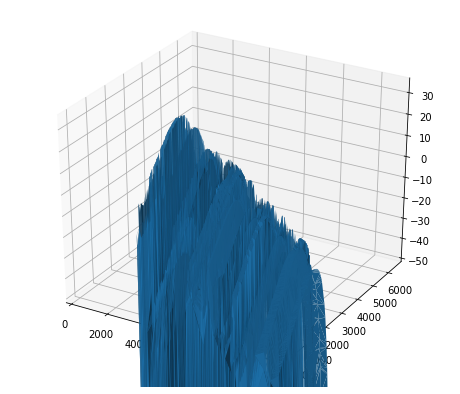

In [83]:
x = trainXY['Burnup']
y = trainXY['CoolingTime']
triang = tri.Triangulation(x, y)
#mesh = np.meshgrid(x, y)
z = trainXY['LogLikelihood']

fig = plt.figure(figsize=(8, 7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(triang, z, linewidth=0.1, cmap=plt.cm.plasma)
ax.set_zlim(-50, 35)
plt.clim(-50, 35)
#ax.scatter(x, y, z)
ax.set_xlabel('Burnup [MWd/MTHM]')
ax.set_ylabel('Cooling Time [days]')
ax.set_zlabel('Log Likelihood')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.zaxis.set_major_locator(MaxNLocator(5))
plt.show()

# ML Estimation
## Coefficients of linear models estimated
This example is done with dependent variable = burnup

In [235]:
class NormMod(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super(NormMod, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        beta = params
        yhat = np.dot(self.exog, beta)
        LL = stats.norm.logpdf(self.endog, loc=yhat)
        return -LL
    
    def fit(self, start_params=None, maxiter=100000, maxfun=100000, **kwds):
        if start_params == None:
            start_params = np.zeros(self.exog.shape[1])
            start_params[0] = np.log(self.endog.mean())
        return super(NormMod, self).fit(start_params=start_params,
                                        maxiter=maxiter, maxfun=maxfun,
                                        **kwds)
    
    def predict(self, nuc_list):
        
        return burn

In [236]:
y = bY
X = sm.add_constant(X)

/home/opotowsky/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [243]:
X.shape

(1197, 11)

In [244]:
X

,const,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
3522,1.0,0.978574,0.003804,0.303402,0.001192,13.984524,7.309633,0.033149,0.045215,0.002106,4.500825e-05
3308,1.0,0.907422,0.019220,0.529089,0.006274,37.040253,18.476717,0.086386,0.228622,0.100228,1.185139e-02
3763,1.0,1.014251,0.002790,0.302920,0.001024,12.289362,5.964539,0.025276,0.037048,0.001422,2.261612e-05
2648,1.0,0.899743,0.012786,0.472476,0.004389,37.794677,20.152091,0.068336,0.242270,0.064410,6.868808e-03
2440,1.0,0.899207,0.013367,0.459698,0.004549,45.274725,24.595405,0.070794,0.279721,0.073891,9.285173e-03
3507,1.0,0.903071,0.001534,0.316696,0.001154,6.207048,3.022907,0.018721,0.025849,0.000695,9.176319e-06
2832,1.0,0.996027,0.004437,0.472548,0.001384,7.608919,3.251001,0.025682,0.051544,0.003717,6.153516e-05
3475,1.0,1.401221,0.000398,0.300295,0.000505,2.038950,1.087489,0.006549,0.008323,0.000071,2.609774e-07
3581,1.0,0.716770,0.000250,0.382149,0.001956,23.703704,13.518519,0.023447,0.090497,0.004777,3.687329e-04
3519,1.0,0.999691,0.003129,0.301145,0.001077,14.095419,7.130624,0.028677,0.038297,0.001500,2.662427e-05


In [238]:
mod = NormMod(y, X)

In [239]:
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 711095.760322
         Iterations: 1873
         Function evaluations: 2735
                               NormMod Results                                
Dep. Variable:                 Burnup   Log-Likelihood:            -8.5118e+08
Model:                        NormMod   AIC:                         1.702e+09
Method:            Maximum Likelihood   BIC:                         1.702e+09
Date:                Wed, 21 Aug 2019                                         
Time:                        14:53:02                                         
No. Observations:                1197                                         
Df Residuals:                    1186                                         
Df Model:                          10                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [255]:
res.params

array([ 719.87364173,  372.1537983 ,  131.04135695,   55.25179493,
        170.74371014,  425.69821348, -482.04606861,  -54.12044023,
        -21.9820938 , -443.23251029, -324.78268586])

In [ ]:
test_sample.insert(0, 'const', 1.0)

In [273]:
burn_pred = np.sum(test_sample.iloc[0] * res.params)
burn_pred, test_answer['Burnup']

(4128.9950318271685, 3050    2984.46
 Name: Burnup, dtype: float64)